# CODIFICACI√ìN:

In [26]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel

In [27]:
#--------------------------------------------------
    # Curva IS

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

In [28]:
# Primero declarar los simbolos
Co, Io, Go, Xo, h, r, b, m, t, Y = symbols('Co Io Go Xo h r b m t Y')

# Ecuacion de la curva IS 
r_eq_is = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y

# tomar diferenciales
df_r_eq_is_y = diff(r_eq_is, Y)

print("La pendiente de la curva IS es", df_r_eq_is_y)  # este diferencial es positivo

La pendiente de la curva IS es -(-(1 - t)*(b - m) + 1)/h


In [29]:
# Declaren todos los parametros de la curva lm como simbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Escribir la ecuacion de la LM 
r_eq_lm = - (1/j)*(Ms/P) + (k/j)*Y

# TOMAR el diferencial
df_r_eq_lm_y = diff(r_eq_lm, Y)
print("La pendiente de la curva IS es", df_r_eq_lm_y)  # este diferencial es positivo

La pendiente de la curva IS es k/j


**1. Encuentre las ecuaciones de Ingreso ($Y^e$) y tasa de interes ($r^e$) de equilibrio (Escriba paso a paso la derivacion de estas ecuaciones).**

* Ingreso de equilibrio ($Y^e$)

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

* Tasa de inter√©s ($r^e$)

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$


**2. Grafique el equilibrio simult√°neo en los mercados de bienes y de dinero.**

In [30]:
#--------------------------------------------------
    # Curva IS

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

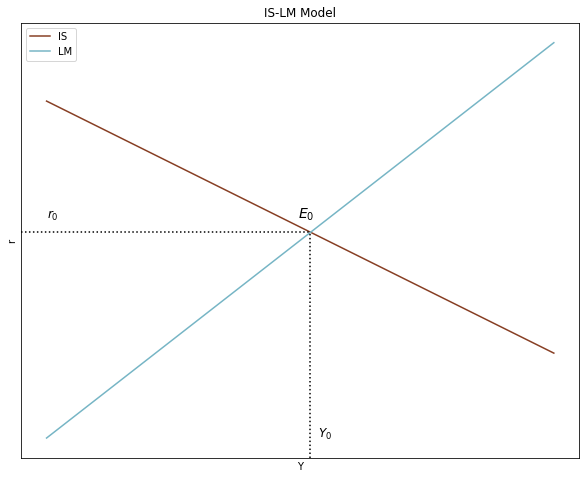

In [31]:
# Gr√°fico del modelo IS-LM

# Dimensiones del gr√°fico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "#873e23") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "#76b5c5")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=51.5,  ymin= 0, ymax= 0.52, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# T√≠tulo, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

## **EST√ÅTICA COMPARATIVA**

In [32]:
# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

**1. Analice los efectos sobre las variables end√≥genas Y, r de una disminuci√≥n del gasto fiscal. ($ŒîG < 0$). El an√°lisis debe ser intuitivo, matem√°tico y gr√°fico.**

* **Intuitivo:**

$ŒîG < 0$

$$ G‚Üì ‚Üí DA‚Üì ‚Üí DA<Y ‚Üí Y‚Üì ‚Üí DA = Y $$
$$ Y‚Üì ‚Üí Md‚Üì ‚Üí Md<Ms ‚Üí r‚Üì ‚Üí Md = Ms $$

* **Matem√°tico:**

In [33]:
# nombrar variables como s√≠mbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como s√≠mbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [34]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [35]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


* **Gr√°fica**

In [36]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [37]:
#--------------------------------------------------
    # NUEVA curva IS: reducci√≥n Gasto de Gobienro (Go)
    
# Definir SOLO el par√°metro cambiado
Go = 80

# Generar la ecuaci√≥n con el nuevo par√°metro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

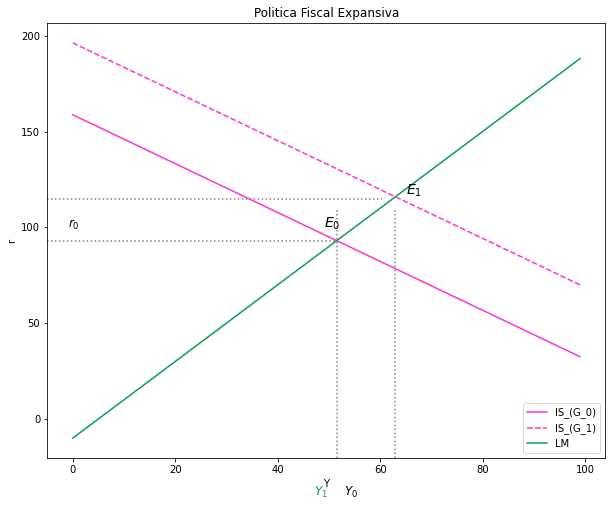

In [40]:
# Gr√°fico

# Dimensiones del gr√°fico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "#FF33CF") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "#FF33CF", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "#0C9C51")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.axvline(x=63,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=115, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(65,117, '$E_1$', fontsize = 14, color = 'black')

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#FF33CF')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#0C9C51')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#0C9C51')

#plt.text(69, 115, '‚Üí', fontsize=15, color='grey')
#plt.text(69, 52, '‚Üê', fontsize=15, color='grey')

# T√≠tulo, ejes y leyenda
ax.set(title="Politica Fiscal Expansiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**2. Analice los efectos sobre las variables end√≥genas Y, r de una disminuci√≥n de la masa monetaria. ($ŒîM^s < 0$). El an√°lisis debe ser intuitivo, matem√°tico y gr√°fico.**

* **Intuitivo:**

$ŒîM^s < 0$

$$ M^s‚Üì ‚Üí M^o‚Üì ‚Üí M^o < M_d ‚Üí r‚Üë $$
$$ r‚Üë ‚Üí I‚Üì ‚Üí DA < Y ‚Üí Y‚Üì $$

* **Matem√°tico:**

In [41]:
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como s√≠mbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [42]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [43]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este dife

El Diferencial del producto con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


* **Gr√°fico:**

In [44]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.6
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [45]:
# Definir SOLO el par√°metro cambiado
Ms = 41

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

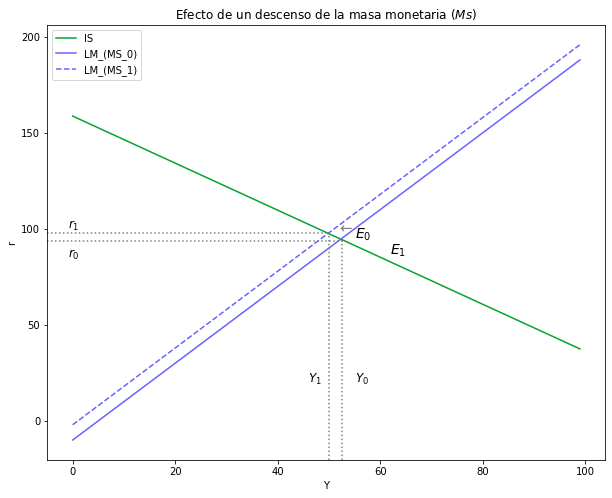

In [47]:
# Gr√°fico

# Dimensiones del gr√°fico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "#04A22E") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "#6662FE")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "#6662FE", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=50,  ymin= 0, ymax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=93.5, xmin= 0, xmax= 0.53, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=52.5,  ymin= 0, ymax= 0.51, linestyle = ":", color = "grey")
plt.axhline(y=98, xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
plt.text(62,87, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(55,95, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,85, '$r_0$', fontsize = 12, color = 'black')
plt.text(55,20, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 12, color = 'black')
plt.text(-1,100, '$r_1$', fontsize = 12, color = 'black')
plt.text(46,20, '$Y_1$', fontsize = 12, color = 'black')

#plt.text(69, 11, '‚Üí', fontsize=15, color='grey')
plt.text(52, 98, '‚Üê', fontsize=15, color='grey')

# T√≠tulo, ejes y leyenda
ax.set(title="Efecto de un descenso de la masa monetaria ($Ms$)", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**3. Analice los efectos sobre las variables end√≥genas Y, r de un incremento de la tasa de impuestos. ($Œît > 0$). El an√°lisis debe ser intuitivo, matem√°tico y gr√°fico.**

* **Intuitivo:**

$$ t‚Üë ‚Üí DA‚Üì ‚Üí DA < Y ‚Üí Y‚Üì ‚Üí DA = Y $$
$$ Y‚Üì ‚Üí M_d‚Üì ‚Üí M_d < M_s ‚Üí r‚Üì ‚Üí M_d = M_s $$

* **Matem√°tico:**

In [48]:
# nombrar variables como s√≠mbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como s√≠mbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
r_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
Y_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [49]:
df_Y_eq_t = diff(Y_eq, t)
print("El Diferencial del Producto con respecto al diferencial de la tasa de impuestos = ", df_Y_eq_t)  #

El Diferencial del Producto con respecto al diferencial de la tasa de impuestos =  -Ms*h*j*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - j**2*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


In [52]:
df_r_eq_t = diff(r_eq, t)
print("El Diferencial de la tasa de interes con respecto al diferencial de la tasa de impuestos = ", df_r_eq_t)

El Diferencial de la tasa de interes con respecto al diferencial de la tasa de impuestos =  Ms*j*(b - m)*(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))**2) - Ms*(b - m)/(P*(h*k + j*(-(1 - t)*(b - m) + 1))) - j*k*(b - m)*(Co + Go + Io + Xo)/(h*k + j*(-(1 - t)*(b - m) + 1))**2


* **Gr√°fico:**

In [53]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.3
t = 0.1

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [54]:
#--------------------------------------------------
    # NUEVA curva IS
    
# Definir SOLO el par√°metro cambiado
t = 0.7

# Generar la ecuaci√≥n con el nuevo par√°metro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

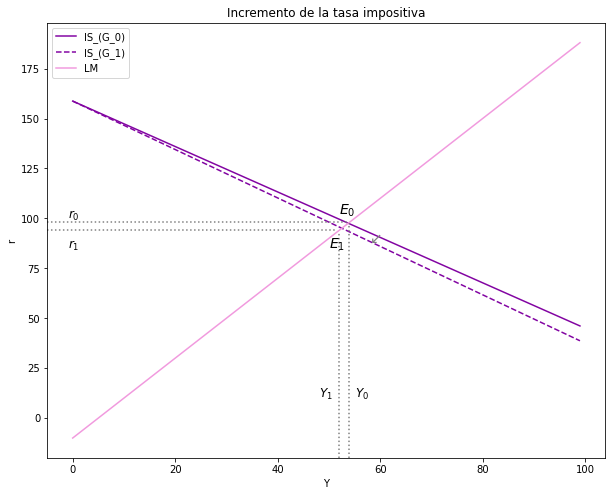

In [55]:
# Gr√°fico

# Dimensiones del gr√°fico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "#8204A2") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "#8204A2", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "#F19ADE")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=54,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")
plt.axhline(y=98, xmin= 0, xmax= 0.54, linestyle = ":", color = "grey")

plt.axvline(x=52,  ymin= 0, ymax= 0.52, linestyle = ":", color = "grey")
plt.axhline(y=94, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
plt.text(50,85, '$E_1$', fontsize = 14, color = 'black')

plt.text(52,102, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(55,10, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = 'black')
plt.text(-1,85, '$r_1$', fontsize = 12, color = 'black')
plt.text(48,10, '$Y_1$', fontsize = 12, color = 'black')

#plt.text(69, 115, '‚Üí', fontsize=15, color='grey')
plt.text(58, 88, '‚Üô', fontsize=15, color='grey')

# T√≠tulo, ejes y leyenda
ax.set(title="Incremento de la tasa impositiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

# $Puntos$    $extra$

**1. Encuentre las ecuaciones de Ingreso  y tasa de interes  de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).**

$$ Y = C + I + G $$
$$ Y = C_0 * bY^d + I_0 - hr + G_0 $$
$$ Y = (C_0 + I_0 -h(r) + G_0) + (b (1 - t)) Y $$
$$ :. DA =  Œ±_1 + Œ±_2 Y $$


$$[1-(b)(1-t)]Y = C_0+I_0+ G_0 - h(r)$$
$$ Y = \frac{1}{[1-(b)(1-t)]}(C_0+I_0+ G_0 - h(r)) $$

$$ :. Y = \frac{B_0 - hr}{B_1} $$



La ecuaci√≥n de la curva LM... 

$$  \frac{Mo^s}{P_o} = kY - j(r+ùúã^e) $$
$$ \frac{Mo^s}{P_o} = kY - ji $$ 

$$ :. Y = \frac{Mo^s}{(P_o)k} + \frac{j(i)}{k} $$


**Ingreso y la tasa de inter√©s de equilibrio...**

$$ -\frac{1}{j} \frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_0}{h} - {B_1} - {B_1}{h}Y $$

$$ :. Y^e = \frac{jB_0}{kh + jB_1} - (\frac{B_1}{kh+jB_1}) \frac{Mo^s}{(P_o)}  $$

$$ :. r^e = B_0 - \frac{Mo^s(B_1) + B_1(j)(i)(P_0)}{P_o(k)} $$

**2. Grafique el equilibrio simult√°neo en los mercados de bienes y de dinero.**

In [56]:
#--------------------------------------------------
    # Curva IS

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.4
m = 0.5
t = 0.8
i = 0.2

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, h, Y, i):
    r_IS = (Co + Io + Go)/h - ( ( 1-b*(1-t)) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, h, Y, i)


#--------------------------------------------------
    # Curva LM 

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 300             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

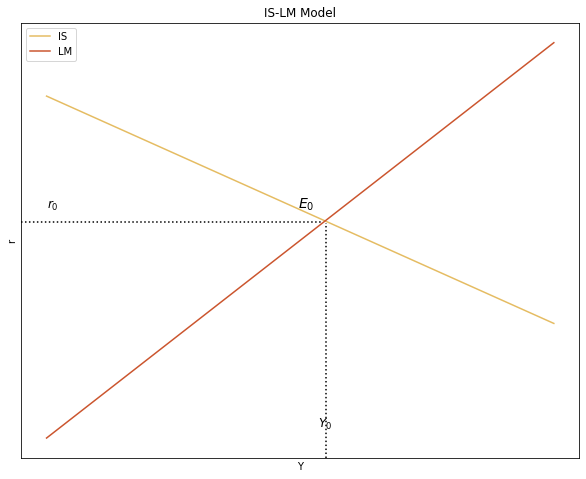

In [57]:
# Gr√°fico del modelo IS-LM

# Dimensiones del gr√°fico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "#E5BC62") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "#CB552E")  #LM



# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=54.5,  ymin= 0, ymax= 0.54, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=93, xmin= 0, xmax= 0.54, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# T√≠tulo, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.show()

# Est√°tica Comparativa

**1. Analice los efectos sobre las variables end√≥genas Y, r de una disminuci√≥n de los Precios. ($ŒîP < 0$). El an√°lisis debe ser intuitivo, matem√°tico y gr√°fico.**

* **Intuitivo**

$$ P^o‚Üì ‚Üí M_s‚Üë ‚Üí M_s > M_d ‚Üí r‚Üì $$
$$ Y‚Üì ‚Üí M_d‚Üì ‚Üí M_d < M_s ‚Üí r‚Üì ‚Üí M_d = M_s $$

* **Gr√°fico**

In [60]:
#--------------------------------------------------
    # Curva IS

# Par√°metros

Y_size = 100 

Co = 35
Io = 40
Go = 50
h = 0.8
b = 0.4
m = 0.5
t = 0.8
i = 0.2

Y = np.arange(Y_size)


# Ecuaci√≥n 
def r_IS(b, m, t, Co, Io, Go, h, Y, i):
    r_IS = (Co + Io + Go)/h - ( ( 1-b*(1-t)) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, h, Y, i)


#--------------------------------------------------
    # Curva LM 

# Par√°metros

Y_size = 100

k = 2
j = 1                
Ms = 300             
P  = 20               

Y = np.arange(Y_size)

# Ecuaci√≥n

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r = r_LM( k, j, Ms, P, Y)

In [61]:
#--------------------------------------------------
    # NUEVA curva LM: 
    
# Definir SOLO el par√°metro cambiado
P = 12

# Generar la ecuaci√≥n con el nuevo par√°metro
def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_G = r_LM( k, j, Ms, P, Y)

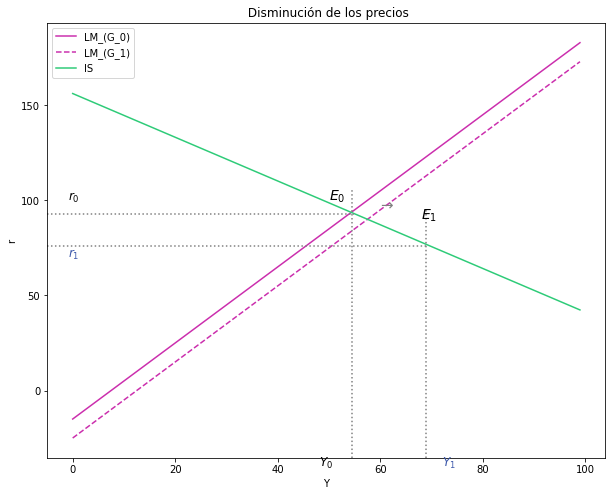

In [63]:
# Gr√°fico

# Dimensiones del gr√°fico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "LM_(G_0)", color = "#CB2EAD") #LM_orginal
ax.plot(Y, r_G, label = "LM_(G_1)", color = "#CB2EAD", linestyle = 'dashed') #LM_modificada

ax.plot(Y, r_is, label="IS", color = "#2ECB78")  #IS_original

# Texto y figuras agregadas
plt.axvline(x=54.5,  ymin= 0, ymax= 0.62, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.55, linestyle = ":", color = "grey")

plt.axvline(x=69,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=76, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")
plt.text(68,90, '$E_1$', fontsize = 14, color = 'black')

plt.text(50,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(48,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
plt.text(-1,70, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(72,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

plt.text(60, 95, '‚Üí', fontsize=15, color='grey')
#plt.text(69, 52, '‚Üê', fontsize=15, color='grey')

# T√≠tulo, ejes y leyenda
ax.set(title=" Disminuci√≥n de los precios", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

**2. Analice los efectos sobre las variables end√≥genas Y, r de una disminuci√≥n de la inflaci√≥n esperada. ($ŒîœÄ < 0$). El an√°lisis debe ser intuitivo, matem√°tico y gr√°fico.**

* **Intuitivo**
* **Matem√°tico**
* **Gr√°fico**